In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_excel("churn.xlsx")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID', axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values

array([29.85, 1889.5, 108.15, ..., 346.45, 306.6, 6844.5], dtype=object)

In [5]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [8]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\User\AppData\Local\Temp\ipykernel_15624\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

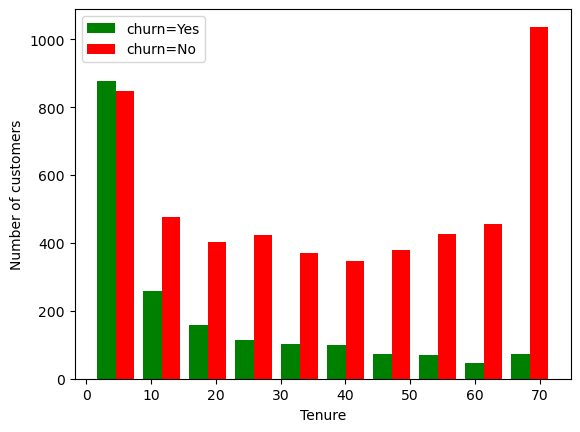

In [10]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=(['churn=Yes', 'churn=No']))
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.legend()

In [12]:
def print_uniqe_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [13]:
print_uniqe_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
df1.replace('No internet service', 'No', inplace=True)
df1.replace('No phone service', 'No', inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_15624\4245438437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15624\4245438437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No', inplace=True)


In [15]:
print_uniqe_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                 'PaperlessBilling', 'Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)
    

C:\Users\User\AppData\Local\Temp\ipykernel_15624\493776169.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


In [19]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [21]:
for cell in df1.gender:
    df1.gender.replace({'Male': 1, 'Female': 0}, inplace=True)
    

C:\Users\User\AppData\Local\Temp\ipykernel_15624\3981543436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.gender.replace({'Male': 1, 'Female': 0}, inplace=True)


In [22]:
df1.gender

0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7032, dtype: int64

In [34]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [2 1 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: [0 1 2]
PaperlessBilling: [1 0]
PaymentMethod: [3 2 1 0]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [33]:
df1 = df1.drop(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'], axis='columns')

In [25]:
for cell in df1.InternetService:
    df1.InternetService.replace({'DSL': 2, 'Fiber optic': 1, 'No': 0}, inplace=True)

In [27]:
for cell in df1.Contract:
    df1.Contract.replace({'Two year': 2, 'One year': 1, 'Month-to-month': 0}, inplace=True)

In [29]:
#pd.get_dummies(data = df1, columns=[''])



In [31]:
for cell in df1.PaymentMethod:
    df1.PaymentMethod.replace({'Electronic check': 3, 'Mailed check': 2,
                               'Bank transfer (automatic)': 1, 'Credit card (automatic)' : 0}, inplace=True)

In [35]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [36]:
close_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[close_to_scale] = scaler.fit_transform(df1[close_to_scale])

In [37]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0.000000,0,0,2,0,1,0,0,0,0,0,1,3,0.115423,0.001275,0
1,1,0,0,0,0.464789,1,0,2,1,0,1,0,0,0,1,0,2,0.385075,0.215867,0
2,1,0,0,0,0.014085,1,0,2,1,1,0,0,0,0,0,1,2,0.354229,0.010310,1
3,1,0,0,0,0.619718,0,0,2,1,0,1,1,0,0,1,0,1,0.239303,0.210241,0
4,0,0,0,0,0.014085,1,0,1,0,0,0,0,0,0,0,1,3,0.521891,0.015330,1


In [38]:
X = df1.drop('Churn', axis='columns')
y = df1['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [40]:
X_train.shape

(5625, 19)

In [41]:
len(X_train.columns)

19

In [53]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(optimizer='RMSprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
176/176 [==============================] - 1s 987us/step - loss: 0.5547 - accuracy: 0.7111
Epoch 2/1000
176/176 [==============================] - 0s 906us/step - loss: 0.4432 - accuracy: 0.7865
Epoch 3/1000
176/176 [==============================] - 0s 886us/step - loss: 0.4306 - accuracy: 0.7916
Epoch 4/1000
176/176 [==============================] - 0s 987us/step - loss: 0.4244 - accuracy: 0.7964
Epoch 5/1000
176/176 [==============================] - 0s 895us/step - loss: 0.4222 - accuracy: 0.7998
Epoch 6/1000
176/176 [==============================] - 0s 897us/step - loss: 0.4199 - accuracy: 0.8012
Epoch 7/1000
176/176 [==============================] - 0s 915us/step - loss: 0.4170 - accuracy: 0.8016
Epoch 8/1000
176/176 [==============================] - 0s 895us/step - loss: 0.4153 - accuracy: 0.8052
Epoch 9/1000
176/176 [==============================] - 0s 895us/step - loss: 0.4143 - accuracy: 0.8050
Epoch 10/1000
176/176 [==============================] - 0s 895u

176/176 [==============================] - 0s 895us/step - loss: 0.3876 - accuracy: 0.8194
Epoch 80/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3870 - accuracy: 0.8212
Epoch 81/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3873 - accuracy: 0.8215
Epoch 82/1000
176/176 [==============================] - 0s 808us/step - loss: 0.3874 - accuracy: 0.8190
Epoch 83/1000
176/176 [==============================] - 0s 806us/step - loss: 0.3859 - accuracy: 0.8190
Epoch 84/1000
176/176 [==============================] - 0s 891us/step - loss: 0.3869 - accuracy: 0.8167
Epoch 85/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3868 - accuracy: 0.8197
Epoch 86/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3867 - accuracy: 0.8229
Epoch 87/1000
176/176 [==============================] - 0s 894us/step - loss: 0.3865 - accuracy: 0.8212
Epoch 88/1000
176/176 [==============================] - 0s 895us/ste

176/176 [==============================] - 0s 805us/step - loss: 0.3755 - accuracy: 0.8265
Epoch 157/1000
176/176 [==============================] - 0s 806us/step - loss: 0.3769 - accuracy: 0.8300
Epoch 158/1000
176/176 [==============================] - 0s 808us/step - loss: 0.3769 - accuracy: 0.8276
Epoch 159/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3768 - accuracy: 0.8268
Epoch 160/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3765 - accuracy: 0.8265
Epoch 161/1000
176/176 [==============================] - 0s 941us/step - loss: 0.3768 - accuracy: 0.8268
Epoch 162/1000
176/176 [==============================] - 0s 851us/step - loss: 0.3764 - accuracy: 0.8284
Epoch 163/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3760 - accuracy: 0.8268
Epoch 164/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3762 - accuracy: 0.8283
Epoch 165/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 897us/step - loss: 0.3701 - accuracy: 0.8279
Epoch 234/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3695 - accuracy: 0.8347
Epoch 235/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3699 - accuracy: 0.8313
Epoch 236/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3705 - accuracy: 0.8336
Epoch 237/1000
176/176 [==============================] - 0s 894us/step - loss: 0.3698 - accuracy: 0.8327
Epoch 238/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3710 - accuracy: 0.8299
Epoch 239/1000
176/176 [==============================] - 0s 880us/step - loss: 0.3696 - accuracy: 0.8329
Epoch 240/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3694 - accuracy: 0.8370
Epoch 241/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3689 - accuracy: 0.8316
Epoch 242/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 808us/step - loss: 0.3642 - accuracy: 0.8359
Epoch 311/1000
176/176 [==============================] - 0s 806us/step - loss: 0.3645 - accuracy: 0.8348
Epoch 312/1000
176/176 [==============================] - 0s 808us/step - loss: 0.3638 - accuracy: 0.8395
Epoch 313/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3640 - accuracy: 0.8352
Epoch 314/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3636 - accuracy: 0.8373
Epoch 315/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3635 - accuracy: 0.8375
Epoch 316/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3630 - accuracy: 0.8356
Epoch 317/1000
176/176 [==============================] - 0s 894us/step - loss: 0.3634 - accuracy: 0.8395
Epoch 318/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3636 - accuracy: 0.8364
Epoch 319/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 895us/step - loss: 0.3593 - accuracy: 0.8347
Epoch 388/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3601 - accuracy: 0.8395
Epoch 389/1000
176/176 [==============================] - 0s 926us/step - loss: 0.3592 - accuracy: 0.8421
Epoch 390/1000
176/176 [==============================] - 0s 866us/step - loss: 0.3577 - accuracy: 0.8421
Epoch 391/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3606 - accuracy: 0.8377
Epoch 392/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3597 - accuracy: 0.8357
Epoch 393/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3607 - accuracy: 0.8377
Epoch 394/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3593 - accuracy: 0.8427
Epoch 395/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3599 - accuracy: 0.8393
Epoch 396/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 823us/step - loss: 0.3569 - accuracy: 0.8423
Epoch 465/1000
176/176 [==============================] - 0s 894us/step - loss: 0.3571 - accuracy: 0.8425
Epoch 466/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3552 - accuracy: 0.8421
Epoch 467/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3561 - accuracy: 0.8418
Epoch 468/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3559 - accuracy: 0.8404
Epoch 469/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3566 - accuracy: 0.8425
Epoch 470/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3566 - accuracy: 0.8412
Epoch 471/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3554 - accuracy: 0.8462
Epoch 472/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3556 - accuracy: 0.8377
Epoch 473/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 897us/step - loss: 0.3534 - accuracy: 0.8436
Epoch 542/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3517 - accuracy: 0.8446
Epoch 543/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3530 - accuracy: 0.8484
Epoch 544/1000
176/176 [==============================] - 0s 983us/step - loss: 0.3540 - accuracy: 0.8430
Epoch 545/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3543 - accuracy: 0.8428
Epoch 546/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3543 - accuracy: 0.8407
Epoch 547/1000
176/176 [==============================] - 0s 984us/step - loss: 0.3543 - accuracy: 0.8436
Epoch 548/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3544 - accuracy: 0.8421
Epoch 549/1000
176/176 [==============================] - 0s 897us/step - loss: 0.3539 - accuracy: 0.8425
Epoch 550/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 923us/step - loss: 0.3530 - accuracy: 0.8411
Epoch 619/1000
176/176 [==============================] - 0s 918us/step - loss: 0.3532 - accuracy: 0.8428
Epoch 620/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3530 - accuracy: 0.8432
Epoch 621/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3523 - accuracy: 0.8439
Epoch 622/1000
176/176 [==============================] - 0s 900us/step - loss: 0.3530 - accuracy: 0.8436
Epoch 623/1000
176/176 [==============================] - 0s 906us/step - loss: 0.3540 - accuracy: 0.8450
Epoch 624/1000
176/176 [==============================] - 0s 918us/step - loss: 0.3510 - accuracy: 0.8441
Epoch 625/1000
176/176 [==============================] - 0s 918us/step - loss: 0.3526 - accuracy: 0.8437
Epoch 626/1000
176/176 [==============================] - 0s 906us/step - loss: 0.3534 - accuracy: 0.8432
Epoch 627/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 952us/step - loss: 0.3520 - accuracy: 0.8446
Epoch 696/1000
176/176 [==============================] - 0s 929us/step - loss: 0.3519 - accuracy: 0.8443
Epoch 697/1000
176/176 [==============================] - 0s 946us/step - loss: 0.3513 - accuracy: 0.8418
Epoch 698/1000
176/176 [==============================] - 0s 929us/step - loss: 0.3506 - accuracy: 0.8437
Epoch 699/1000
176/176 [==============================] - 0s 935us/step - loss: 0.3508 - accuracy: 0.8418
Epoch 700/1000
176/176 [==============================] - 0s 929us/step - loss: 0.3507 - accuracy: 0.8432
Epoch 701/1000
176/176 [==============================] - 0s 946us/step - loss: 0.3507 - accuracy: 0.8460
Epoch 702/1000
176/176 [==============================] - 0s 952us/step - loss: 0.3510 - accuracy: 0.8427
Epoch 703/1000
176/176 [==============================] - 0s 952us/step - loss: 0.3509 - accuracy: 0.8443
Epoch 704/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 906us/step - loss: 0.3476 - accuracy: 0.8439
Epoch 773/1000
176/176 [==============================] - 0s 900us/step - loss: 0.3480 - accuracy: 0.8498
Epoch 774/1000
176/176 [==============================] - 0s 920us/step - loss: 0.3481 - accuracy: 0.8404
Epoch 775/1000
176/176 [==============================] - 0s 906us/step - loss: 0.3495 - accuracy: 0.8450
Epoch 776/1000
176/176 [==============================] - 0s 915us/step - loss: 0.3482 - accuracy: 0.8450
Epoch 777/1000
176/176 [==============================] - 0s 917us/step - loss: 0.3479 - accuracy: 0.8441
Epoch 778/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3485 - accuracy: 0.8430
Epoch 779/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3491 - accuracy: 0.8432
Epoch 780/1000
176/176 [==============================] - 0s 895us/step - loss: 0.3479 - accuracy: 0.8460
Epoch 781/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 916us/step - loss: 0.3450 - accuracy: 0.8444
Epoch 850/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3446 - accuracy: 0.8450
Epoch 851/1000
176/176 [==============================] - 0s 918us/step - loss: 0.3440 - accuracy: 0.8459
Epoch 852/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3444 - accuracy: 0.8411
Epoch 853/1000
176/176 [==============================] - 0s 910us/step - loss: 0.3451 - accuracy: 0.8469
Epoch 854/1000
176/176 [==============================] - 0s 923us/step - loss: 0.3432 - accuracy: 0.8434
Epoch 855/1000
176/176 [==============================] - 0s 923us/step - loss: 0.3453 - accuracy: 0.8450
Epoch 856/1000
176/176 [==============================] - 0s 918us/step - loss: 0.3448 - accuracy: 0.8459
Epoch 857/1000
176/176 [==============================] - 0s 929us/step - loss: 0.3464 - accuracy: 0.8430
Epoch 858/1000
176/176 [==============================] - 0s 

176/176 [==============================] - 0s 923us/step - loss: 0.3432 - accuracy: 0.8427
Epoch 927/1000
176/176 [==============================] - 0s 900us/step - loss: 0.3444 - accuracy: 0.8446
Epoch 928/1000
176/176 [==============================] - 0s 900us/step - loss: 0.3432 - accuracy: 0.8448
Epoch 929/1000
176/176 [==============================] - 0s 900us/step - loss: 0.3413 - accuracy: 0.8452
Epoch 930/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3418 - accuracy: 0.8469
Epoch 931/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3418 - accuracy: 0.8459
Epoch 932/1000
176/176 [==============================] - 0s 918us/step - loss: 0.3420 - accuracy: 0.8441
Epoch 933/1000
176/176 [==============================] - 0s 906us/step - loss: 0.3418 - accuracy: 0.8428
Epoch 934/1000
176/176 [==============================] - 0s 912us/step - loss: 0.3410 - accuracy: 0.8484
Epoch 935/1000
176/176 [==============================] - 0s 

In [59]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 727us/step - loss: 0.6152 - accuracy: 0.7761


[0.6152341961860657, 0.7761194109916687]

In [61]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.45675787],
       [0.3240437 ],
       [0.00585722],
       [0.6067187 ],
       [0.36486435]], dtype=float32)

In [64]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [65]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       999
           1       0.67      0.45      0.54       408

    accuracy                           0.78      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.76      0.78      0.76      1407



Text(95.72222222222221, 0.5, 'Truth')

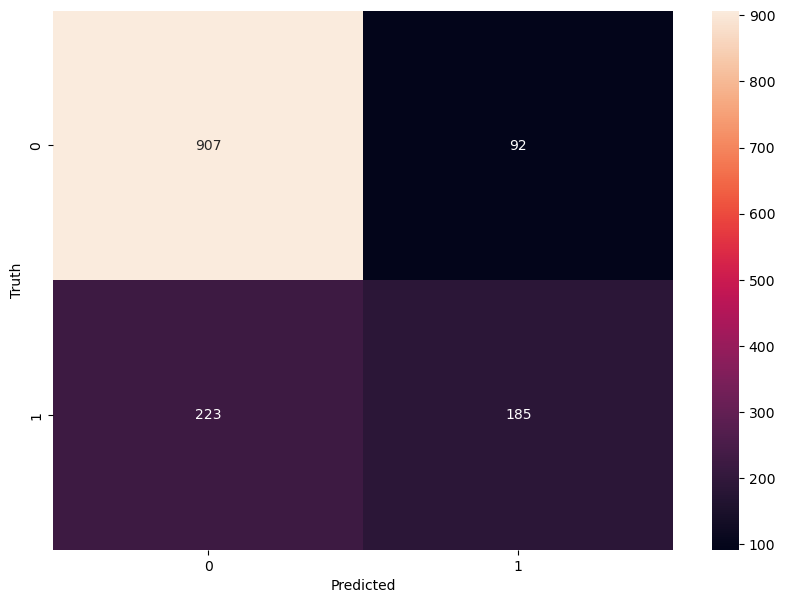

In [69]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')